In [7]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [11]:
df["Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [13]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"



In [15]:
df['Rating'] = df['Rating'].apply(ratings)

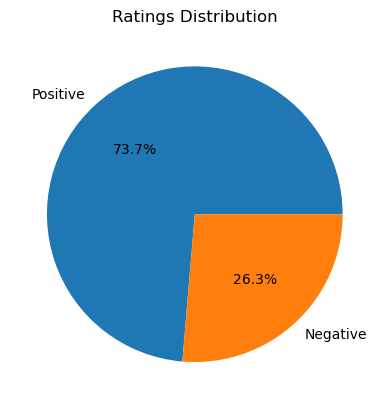

In [17]:
import matplotlib.pyplot as plt

ratings_count = df["Rating"].value_counts()
labels = df["Rating"].unique().tolist()

plt.pie(ratings_count, labels=ratings_count.index, autopct='%1.1f%%')
plt.title("Ratings Distribution")
plt.show()


In [19]:
length = len(df['Review'][0])
print(f'Length of sample review:{length}')

Length of sample review:593


In [21]:
df['Length'] = df["Review"].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [23]:
word_count = df["Review"][0].split()
print(f"{len(word_count)}")

87


In [25]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

df.head()

,Review,Rating,Length,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571


In [27]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

591.0

In [29]:
df['mean_sent_length'] = df["Review"].map(lambda rev: np.mean([len(sent)
                                                              for sent in tokenize.sent_tokenize(rev)]))

df.head()

,Review,Rating,Length,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,5.804598,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,5.701571,1279.0


term frequencies analysis

In [32]:
features = df.columns.tolist()[2:]
df=df.drop(features,axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [40]:
import re
from nltk.corpus import stopwords

def clean(review): 
    review = review.lower()
    review = re.sub('[^a-zA-Z0-9\s]', '', review)
    stop_words = set(stopwords.words('english'))
    review = " ".join([word for word in review.split() if word not in stop_words])
    return review
df['Review'] = df['Review'].apply(clean)
df.head()


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bknai\AppData\Local\Temp\ipykernel_6816\426450844.py:9: SyntaxWarning: invalid escape sequence '\s'
  review = re.sub('[^a-zA-Z0-9\s]', '', review)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [42]:
def corpus(text):
    text_list = text.split()
    return text_list

In [44]:
df["Review_lists"] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [48]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
    corpus+=df["Review_lists"] [i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 113790.16it/s]


2060723

In [52]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48888),
 ('room', 34323),
 ('great', 21090),
 ('nt', 18989),
 ('good', 16976),
 ('staff', 16206),
 ('stay', 15155),
 ('nice', 12402),
 ('rooms', 12022),
 ('location', 11034)]

In [59]:
words=[]
freq=[]
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

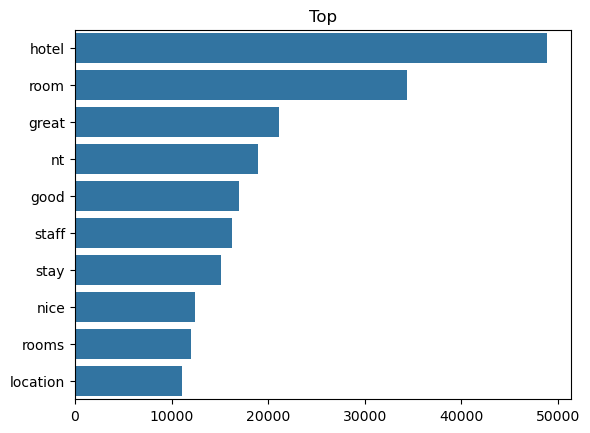

In [63]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title("Top")
plt.show()

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range =(2,2))